In [1]:
import tensorflow as tf
import numpy as np
from __future__ import division, print_function, absolute_import


#for plotting
import matplotlib.pyplot as plt

In [2]:
#importing mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
#setting parameters for learning
lr = 0.01
num_epochs = 30
batch_size = 256
display_step = 2

#for plotting
examples_to_show = 10

In [4]:
#setting parameters for network layers
n_input = 784 #28x28
n_hidden_1 = 1568
n_hidden_2 = 3136

In [5]:
#setting up placeholder input and output
X = tf.placeholder("float", [None, n_input])

In [6]:
#setting up layer sizes

weights = {
    'encoder_1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    'encoder_1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_2': tf.Variable(tf.random_normal([n_input]))
}

In [7]:
#setting up the network structure

def encoder(x):
    activation_1 = tf.nn.sigmoid(tf.matmul(x, weights['encoder_1']) + biases['encoder_1'])
    activation_2 = tf.nn.sigmoid(tf.matmul(activation_1, weights['encoder_2']) + biases['encoder_2'])
    return activation_2

def decoder(x):
    activation_1 = tf.nn.sigmoid(tf.matmul(x, weights['decoder_1']) + biases['decoder_1'])
    activation_2 = tf.nn.sigmoid(tf.matmul(activation_1, weights['decoder_2']) + biases['decoder_2'])
    return activation_2

In [8]:
#defining output from the network and supervisory labels (input data itself)
decoded = decoder(encoder(X))
actual = X

In [24]:
#sparsity constraint (KL divergence)
def KL(a,b):
    '''computes KL divergence between distributions a and b'''
    return tf.contrib.distributions.kl(a, b)

# sparsity_constant_distribution = tf.random_uniform(maxval=0.05,
#                                                    minval=0.05, 
#                                                    shape=[batch_size, 784])

# #KL between sparsity_constant and p.hat.j, 
# #the average activation of hidden unit j (averaged over the training set)
# p_hat = decoded
# kl_divergence = KL(sparsity_constant_distribution, p_hat)
# sparsity = tf.reduce_sum(kl_divergence)

In [25]:
#defining loss and optimizer

cost = tf.reduce_mean(tf.pow((actual - decoded), 2)) #L2 norm
optimizer = tf.train.RMSPropOptimizer(lr).minimize(cost)

In [26]:
#initializing all the variables
init = tf.global_variables_initializer()

Epoch= 1  ; cost= 0.222388
Epoch= 3  ; cost= 0.14902
Epoch= 5  ; cost= 0.128579
Epoch= 7  ; cost= 0.121838
Epoch= 9  ; cost= 0.110735
Epoch= 11  ; cost= 0.11014
Epoch= 13  ; cost= 0.103141
Epoch= 15  ; cost= 0.0974715
Epoch= 17  ; cost= 0.097414
Epoch= 19  ; cost= 0.0944747
Epoch= 21  ; cost= 0.0904006
Epoch= 23  ; cost= 0.0881887
Epoch= 25  ; cost= 0.0834231
Epoch= 27  ; cost= 0.0814352
Epoch= 29  ; cost= 0.081886
Optimization Done


/Users/rileyedmunds/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


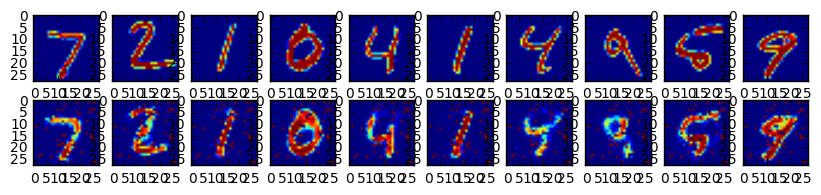

In [27]:
#running the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples / batch_size)
    
    #training
    for epoch in range(num_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            #add noise to x (gaussian)
#             noise = tf.random_normal(shape=[batch_size, 784]).eval()
#             batch_xs = batch_xs + (noise)/5
            
            #optimizing w/ backprop and running cost op (for loss)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        #showing logs per epoch
        if (epoch % display_step) == 0:
            print('Epoch=', epoch+1, ' ; cost=', c)
            
    print("Optimization Done")
    
    
    #running net on test set
    encode_decode = sess.run(decoded, feed_dict={X:mnist.test.images[:examples_to_show]})
    
    #plot input images vs output images
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
        
    f.show()
    plt.draw()
    plt.show()